# Importar Librerias

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from ipywidgets import interact, fixed
from scipy import stats

%matplotlib inline
plt.rcParams['figure.figsize'] = (12,12)

# Load Dataset

In [6]:
vehiculos = pd.read_csv('vehicles.csv')

In [7]:
vehiculos.shape

(38436, 11)

In [8]:
vehiculos.head()

,make,model,year,displ,cylinders,trany,drive,VClass,fuelType,comb08,co2TailpipeGpm
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706
1,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706
2,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385
3,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385
4,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,555.437500


### Renombrar Columnas

In [9]:
vehiculos = vehiculos.rename(columns={
    "cylinders":"cilindros",
    "trany":"transmision",
    "make":"fabricante",
    "model":"modelo",
    "displ":"desplazamiento", #volumen de desplazamiento del motor
    "drive":"traccion",
    "VClass":"clase",
    "fuelType":"combustible",
    "comb08":"consumo", #combined MPG for fuelType1
    "co2TailpipeGpm":"co2", # tailpipe CO2 in grams/mile
})

In [10]:
vehiculos.head()

,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,consumo,co2
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706
1,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706
2,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385
3,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385
4,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,555.437500


In [12]:
vehiculos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38436 entries, 0 to 38435
Data columns (total 11 columns):
fabricante        38436 non-null object
modelo            38436 non-null object
year              38436 non-null int64
desplazamiento    38296 non-null float64
cilindros         38294 non-null float64
transmision       38425 non-null object
traccion          37247 non-null object
clase             38436 non-null object
combustible       38436 non-null object
consumo           38436 non-null int64
co2               38436 non-null float64
dtypes: float64(3), int64(2), object(6)
memory usage: 3.2+ MB


## Descripción de Entidades

- fabricante
- fabricante-modelo
- fabricante-model-año
- fabricante-año

# Diagnostico de Calidad de los Datos

In [17]:
vehiculos['modelo_unico'] = vehiculos.fabricante.str.cat([vehiculos.modelo, vehiculos.year.apply(str)],sep='-')

In [18]:
vehiculos.modelo_unico.value_counts()

Jeep-Cherokee/Wagoneer-1985            24
GMC-C15 Pickup 2WD-1984                19
Chevrolet-C10 Pickup 2WD-1984          19
Ford-F150 Pickup 2WD-1984              19
GMC-S15 Pickup 2WD-1984                18
Chevrolet-C10 Pickup 2WD-1985          18
GMC-C15 Pickup 2WD-1985                18
Chevrolet-S10 Pickup 2WD-1984          18
GMC-C15 Pickup 2WD-1986                17
Chevrolet-C10 Pickup 2WD-1986          17
Mitsubishi-Truck 2WD-1984              17
Dodge-Ram 50 Pickup 2WD-1984           17
Ford-Ranger Pickup 2WD-1984            17
Ford-Escort-1985                       16
Mercury-Lynx-1984                      16
Volkswagen-Rabbit-1984                 16
GMC-Vandura G15/25 2WD-1984            16
Ford-Escort-1984                       16
Chevrolet-G10/20 Van 2WD-1984          16
Ford-F150 Pickup 2WD-1985              16
Dodge-D100/D150 Pickup 2WD-1985        15
Volkswagen-Jetta-1984                  15
Ford-E150 Econoline 2WD-1984           15
Ford-Bronco 4WD-1984              

In [19]:
vehiculos[vehiculos.modelo_unico=='Chevrolet-C1500 Pickup 2WD-1991'].head()

,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,consumo,co2,modelo_unico
4957,Chevrolet,C1500 Pickup 2WD,1991,4.3,6.0,Automatic 4-spd,Rear-Wheel Drive,Standard Pickup Trucks,Regular,17,522.764706,Chevrolet-C1500 Pickup 2WD-1991
4958,Chevrolet,C1500 Pickup 2WD,1991,4.3,6.0,Manual 4-spd,Rear-Wheel Drive,Standard Pickup Trucks,Regular,17,522.764706,Chevrolet-C1500 Pickup 2WD-1991
4959,Chevrolet,C1500 Pickup 2WD,1991,4.3,6.0,Manual 5-spd,Rear-Wheel Drive,Standard Pickup Trucks,Regular,17,522.764706,Chevrolet-C1500 Pickup 2WD-1991
4960,Chevrolet,C1500 Pickup 2WD,1991,4.3,6.0,Manual 5-spd,Rear-Wheel Drive,Standard Pickup Trucks,Regular,17,522.764706,Chevrolet-C1500 Pickup 2WD-1991
4961,Chevrolet,C1500 Pickup 2WD,1991,5.0,8.0,Automatic 4-spd,Rear-Wheel Drive,Standard Pickup Trucks,Regular,15,592.466667,Chevrolet-C1500 Pickup 2WD-1991


In [20]:
vehiculos = vehiculos.drop_duplicates()
vehiculos.shape

(36930, 12)

In [21]:
del vehiculos['modelo_unico']

In [22]:
n_records = len(vehiculos)
def valores_duplicados_col(df):
    for columna in df:
        n_por_valor = df[columna].value_counts()
        mas_comun = n_por_valor.iloc[0]
        menos_comun = n_por_valor.iloc[-1]
        print("{} | {}-{} | {}".format(
            df[columna].name,
            round(mas_comun / (1.0*n_records),3),
            round(menos_comun / (1.0*n_records),3),
            df[columna].dtype
        ))

valores_duplicados_col(vehiculos)

fabricante | 0.1-0.0 | object
modelo | 0.005-0.0 | object
year | 0.038-0.007 | int64
desplazamiento | 0.095-0.0 | float64
cilindros | 0.38-0.0 | float64
transmision | 0.287-0.0 | object
traccion | 0.353-0.005 | object
clase | 0.145-0.0 | object
combustible | 0.652-0.0 | object
consumo | 0.097-0.0 | int64
co2 | 0.084-0.0 | float64


In [23]:
vehiculos.traccion.value_counts(normalize=True)

Front-Wheel Drive             0.360280
Rear-Wheel Drive              0.352863
4-Wheel or All-Wheel Drive    0.177345
All-Wheel Drive               0.062325
4-Wheel Drive                 0.030886
2-Wheel Drive                 0.011402
Part-time 4-Wheel Drive       0.004899
Name: traccion, dtype: float64

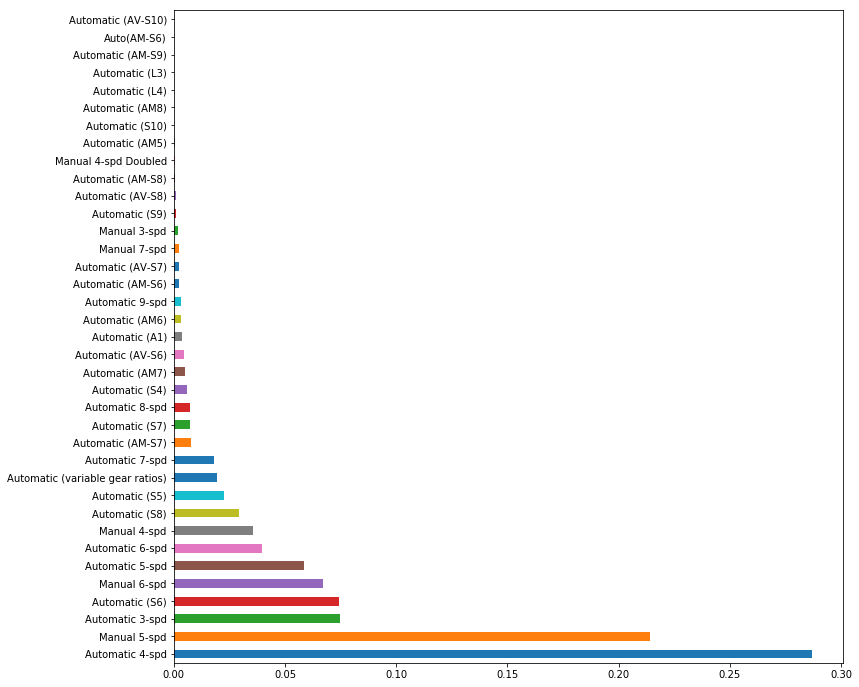

In [24]:
vehiculos.transmision.value_counts(normalize=True).plot.barh();

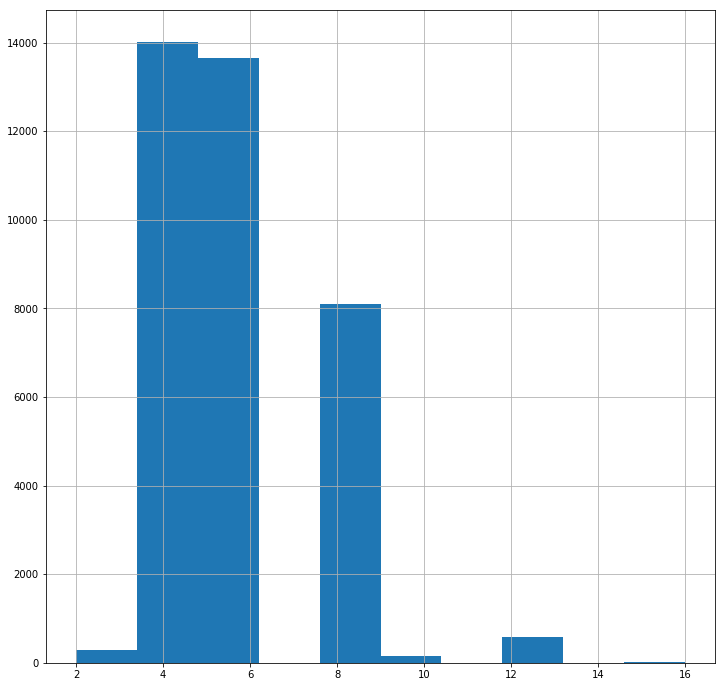

In [25]:
vehiculos.cilindros.hist()

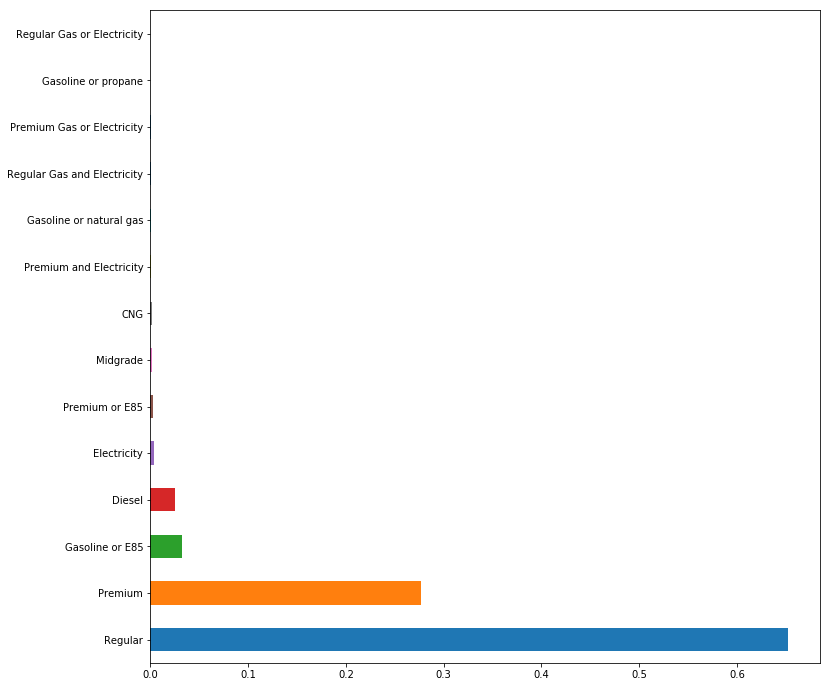

In [26]:
vehiculos.combustible.value_counts(normalize=True).plot.barh()

## Valores Inexistentes

In [27]:
n_records = len(vehiculos)
def valores_inexistentes_col(df):
    for columna in df:
        print("{} | {} | {}".format(
            df[columna].name, len(df[df[columna].isnull()]) / (1.0*n_records), df[columna].dtype
        ))

valores_inexistentes_col(vehiculos)

fabricante | 0.0 | object
modelo | 0.0 | object
year | 0.0 | int64
desplazamiento | 0.0037909558624424585 | float64
cilindros | 0.003845112374763065 | float64
transmision | 0.00029786081776333605 | object
traccion | 0.02158137015976171 | object
clase | 0.0 | object
combustible | 0.0 | object
consumo | 0.0 | int64
co2 | 0.0 | float64


## Valores Extremos

In [28]:
from scipy import stats
import numpy as np

def outliers_col(df):
    for columna in df:
        if df[columna].dtype != np.object:
            n_outliers = len(df[np.abs(stats.zscore(df[columna])) > 3])    
            print("{} | {} | {}".format(
                df[columna].name,
                n_outliers,
                df[columna].dtype
        ))

outliers_col(vehiculos)

year | 0 | int64
desplazamiento | 0 | float64
cilindros | 0 | float64
consumo | 233 | int64
co2 | 358 | float64


C:\Users\vroma\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


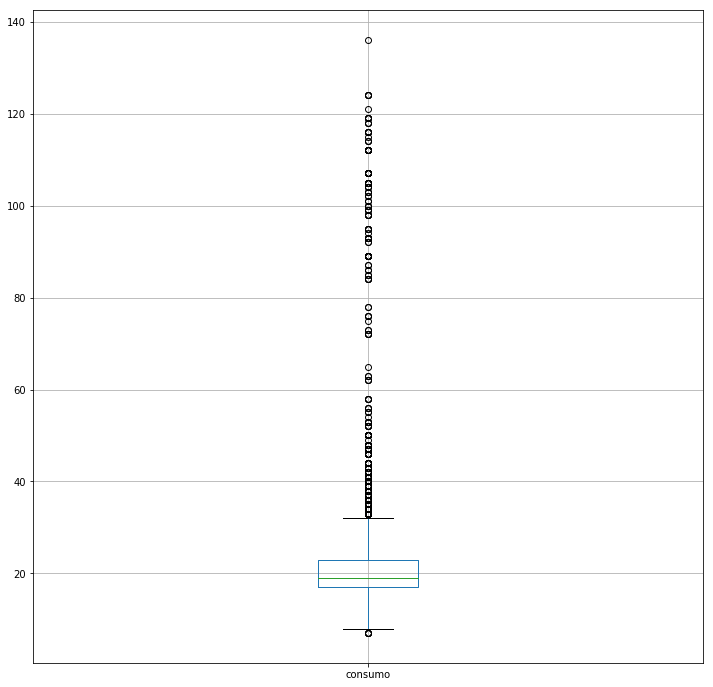

In [29]:
vehiculos.boxplot(column='consumo');

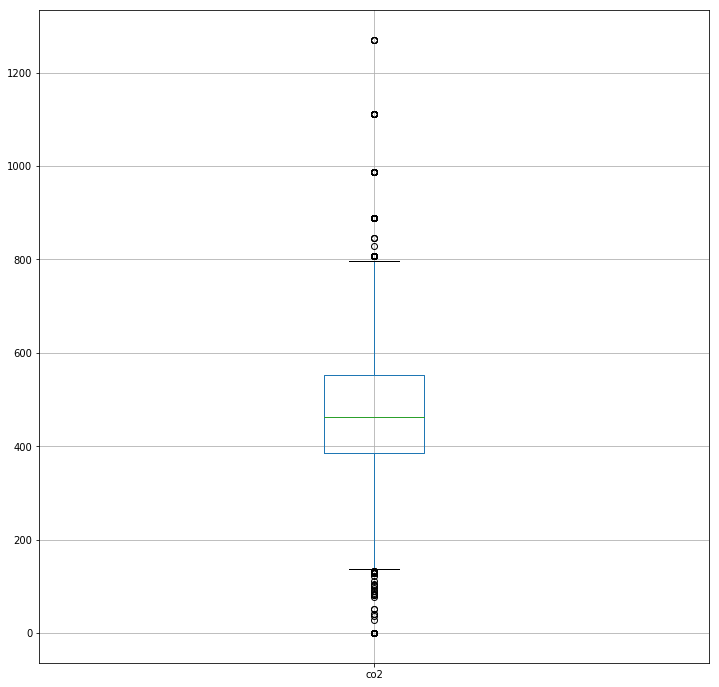

In [30]:
vehiculos.boxplot(column='co2');

In [31]:
vehiculos[vehiculos.co2==0].combustible.unique()

array(['Electricity'], dtype=object)

In [32]:
vehiculos.combustible.unique()

array(['Regular', 'Premium', 'Diesel', 'Premium and Electricity',
       'Premium or E85', 'Electricity', 'Premium Gas or Electricity',
       'Gasoline or E85', 'Gasoline or natural gas', 'CNG',
       'Regular Gas or Electricity', 'Midgrade',
       'Regular Gas and Electricity', 'Gasoline or propane'], dtype=object)

In [33]:
vehiculos_no_electricos = vehiculos[vehiculos.co2>0]

In [34]:
outliers_col(vehiculos_no_electricos)

year | 0 | int64
desplazamiento | 0 | float64
cilindros | 0 | float64
consumo | 400 | int64
co2 | 221 | float64


C:\Users\vroma\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


In [35]:
vehiculos_no_electricos[
    np.abs(stats.zscore(vehiculos_no_electricos["consumo"])) > 3
].combustible.value_counts(normalize=True)

Regular                        0.7175
Diesel                         0.1525
Premium                        0.0550
Regular Gas and Electricity    0.0475
Premium Gas or Electricity     0.0200
Regular Gas or Electricity     0.0050
Premium and Electricity        0.0025
Name: combustible, dtype: float64

In [36]:
valores_duplicados_col(vehiculos_no_electricos)

fabricante | 0.099-0.0 | object
modelo | 0.005-0.0 | object
year | 0.038-0.007 | int64
desplazamiento | 0.095-0.0 | float64
cilindros | 0.38-0.0 | float64
transmision | 0.287-0.0 | object
traccion | 0.351-0.005 | object
clase | 0.145-0.0 | object
combustible | 0.652-0.0 | object
consumo | 0.097-0.0 | int64
co2 | 0.084-0.0 | float64


In [37]:
valores_inexistentes_col(vehiculos)

fabricante | 0.0 | object
modelo | 0.0 | object
year | 0.0 | int64
desplazamiento | 0.0037909558624424585 | float64
cilindros | 0.003845112374763065 | float64
transmision | 0.00029786081776333605 | object
traccion | 0.02158137015976171 | object
clase | 0.0 | object
combustible | 0.0 | object
consumo | 0.0 | int64
co2 | 0.0 | float64


# Conclusiones Calidad de Datos

- Hay 1506 records duplicados 
- las variables `desplazamiento, cilindros, transmision y traccion tienen valores inexistentes`
- La variable `combustible` tiene una clase dominante (65% de coches tienen combustible `Regular`)
- hay un outlier en las variables `co2` y `consumo`
- Hay coches hibridos y coches electricos (hemos removido estos ultimos ya que no contaminan).

# Agrupación de Datos

In [38]:
def unique_col_values(df):
    for column in df:
        print("{} | {} | {}".format(
            df[column].name, len(df[column].unique()), df[column].dtype
        ))

unique_col_values(vehiculos)

fabricante | 133 | object
modelo | 3791 | object
year | 35 | int64
desplazamiento | 67 | float64
cilindros | 10 | float64
transmision | 38 | object
traccion | 8 | object
clase | 34 | object
combustible | 14 | object
consumo | 84 | int64
co2 | 597 | float64


## Agrupación de Variables Categoricas

### Clase de Vehiculo

In [39]:
vehiculos.clase.unique()

array(['Special Purpose Vehicle 2WD', 'Midsize Cars', 'Subcompact Cars',
       'Compact Cars', 'Sport Utility Vehicle - 4WD',
       'Small Sport Utility Vehicle 2WD',
       'Small Sport Utility Vehicle 4WD', 'Two Seaters',
       'Sport Utility Vehicle - 2WD', 'Special Purpose Vehicles',
       'Special Purpose Vehicle 4WD', 'Small Station Wagons',
       'Minicompact Cars', 'Midsize-Large Station Wagons',
       'Midsize Station Wagons', 'Large Cars',
       'Standard Sport Utility Vehicle 4WD',
       'Standard Sport Utility Vehicle 2WD', 'Minivan - 4WD',
       'Minivan - 2WD', 'Vans', 'Vans, Cargo Type',
       'Vans, Passenger Type', 'Standard Pickup Trucks 2WD',
       'Standard Pickup Trucks', 'Standard Pickup Trucks/2wd',
       'Small Pickup Trucks 2WD', 'Standard Pickup Trucks 4WD',
       'Small Pickup Trucks 4WD', 'Small Pickup Trucks', 'Vans Passenger',
       'Special Purpose Vehicle', 'Special Purpose Vehicles/2wd',
       'Special Purpose Vehicles/4wd'], dtype=object

In [40]:
pequeno = ['Compact Cars','Subcompact Cars','Two Seaters','Minicompact Cars']
medio = ['Midsize Cars']
grande = ['Large Cars']

vehiculos.loc[vehiculos['clase'].isin(pequeno), 
             'clase_tipo'] = 'Coches pequeños'

vehiculos.loc[vehiculos['clase'].isin(medio), 
             'clase_tipo'] = 'Coches Medianos'

vehiculos.loc[vehiculos['clase'].isin(grande), 
             'clase_tipo'] = 'Coches Grandes'

vehiculos.loc[vehiculos['clase'].str.contains('Truck'), 
             'clase_tipo'] = 'Camionetas'

vehiculos.loc[vehiculos['clase'].str.contains('Special Purpose'), 
             'clase_tipo'] = 'Vehículos Especiales'

vehiculos.loc[vehiculos['clase'].str.contains('Sport Utility'), 
             'clase_tipo'] = 'Deportivos'

vehiculos.loc[vehiculos['clase'].str.contains('Station'), 
             'clase_tipo'] = 'Coche Familiar'

vehiculos.loc[(vehiculos['clase'].str.lower().str.contains('van')),
             'clase_tipo'] = 'Furgoneta'

In [41]:
vehiculos.clase_tipo = vehiculos.clase_tipo.astype("category")

In [43]:
vehiculos.clase_tipo.dtype

CategoricalDtype(categories=['Camionetas', 'Coche Familiar', 'Coches Grandes',
                  'Coches Medianos', 'Coches pequeños', 'Deportivos',
                  'Furgoneta', 'Vehículos Especiales'],
                 ordered=False)

In [44]:
vehiculos.clase_tipo.value_counts()

Coches pequeños         13055
Camionetas               5446
Deportivos               5313
Coches Medianos          4274
Coche Familiar           2540
Vehículos Especiales     2216
Furgoneta                2213
Coches Grandes           1873
Name: clase_tipo, dtype: int64

### Tracción

In [45]:
vehiculos.traccion.unique()

array(['2-Wheel Drive', 'Rear-Wheel Drive', 'Front-Wheel Drive',
       '4-Wheel or All-Wheel Drive', 'All-Wheel Drive', nan,
       '4-Wheel Drive', 'Part-time 4-Wheel Drive'], dtype=object)

In [46]:
vehiculos["traccion_tipo"] = "dos"
vehiculos["traccion_tipo"][vehiculos.traccion.isin([
    "4-Wheel or All-Wheel Drive", "All-Wheel Drive",
    "4-Wheel Drive", "Part-time 4-Wheel Drive"
])] = "cuatro"

C:\Users\vroma\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [47]:
vehiculos.traccion_tipo = vehiculos.traccion_tipo.astype("category")

### Transmision

In [48]:
vehiculos.transmision.unique()

array(['Automatic 3-spd', 'Automatic 4-spd', 'Manual 5-spd',
       'Automatic (S5)', 'Manual 6-spd', 'Automatic 5-spd',
       'Automatic (AM8)', 'Automatic (AM-S8)', 'Automatic (AV-S7)',
       'Automatic (S6)', 'Automatic (S9)', 'Automatic (AM-S7)',
       'Automatic (S4)', 'Automatic (AM-S9)', 'Automatic (S7)',
       'Automatic (AM7)', 'Automatic (AM6)', 'Automatic 6-spd',
       'Automatic 8-spd', 'Manual 4-spd', 'Automatic (S8)',
       'Manual 7-spd', 'Automatic (AM-S6)', 'Auto(AM-S6)',
       'Automatic (variable gear ratios)', 'Automatic (AV-S8)',
       'Automatic (A1)', 'Automatic (AV-S6)', 'Manual 3-spd',
       'Automatic (S10)', 'Automatic 9-spd', 'Manual 4-spd Doubled', nan,
       'Automatic (L4)', 'Automatic (L3)', 'Automatic (AV-S10)',
       'Automatic 7-spd', 'Automatic (AM5)'], dtype=object)

In [49]:
vehiculos[vehiculos['transmision'].isnull()]

,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,consumo,co2,clase_tipo,traccion_tipo
13374,Ford,Explorer USPS Electric,2001,NaN,NaN,NaN,2-Wheel Drive,Sport Utility Vehicle - 2WD,Electricity,39,0.000000,Deportivos,dos
13375,Ford,Explorer USPS Electric,2002,NaN,NaN,NaN,2-Wheel Drive,Sport Utility Vehicle - 2WD,Electricity,39,0.000000,Deportivos,dos
13423,Ford,F150 Pickup 2WD,1984,5.8,8.0,NaN,2-Wheel Drive,Standard Pickup Trucks 2WD,Regular,11,807.909091,Camionetas,dos
15209,Ford,Th!nk,2001,NaN,NaN,NaN,NaN,Two Seaters,Electricity,65,0.000000,Coches pequeños,dos
15458,GMC,C25 Pickup 2WD,1984,4.1,6.0,NaN,2-Wheel Drive,Standard Pickup Trucks 2WD,Regular,14,634.785714,Camionetas,dos
27984,Nissan,Altra EV,2000,NaN,NaN,NaN,NaN,Midsize Station Wagons,Electricity,85,0.000000,Coche Familiar,dos
28202,Nissan,Hyper-Mini,2001,NaN,NaN,NaN,NaN,Two Seaters,Electricity,75,0.000000,Coches pequeños,dos
35703,Toyota,RAV4 EV,2000,NaN,NaN,NaN,2-Wheel Drive,Sport Utility Vehicle - 2WD,Electricity,72,0.000000,Deportivos,dos
35704,Toyota,RAV4 EV,2001,NaN,NaN,NaN,2-Wheel Drive,Sport Utility Vehicle - 2WD,Electricity,72,0.000000,Deportivos,dos
35705,Toyota,RAV4 EV,2002,NaN,NaN,NaN,2-Wheel Drive,Sport Utility Vehicle - 2WD,Electricity,78,0.000000,Deportivos,dos


In [50]:
vehiculos['transmision_tipo'] = "Automatica"
vehiculos['transmision_tipo'][
    (vehiculos['transmision'].notnull()) & (vehiculos['transmision'].str.startswith('M'))
] = "Manual"

C:\Users\vroma\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [51]:
vehiculos.transmision_tipo = vehiculos.transmision_tipo.astype("category")

In [52]:
vehiculos.transmision_tipo.value_counts()

Automatica    25076
Manual        11854
Name: transmision_tipo, dtype: int64

### Combustible

In [53]:
vehiculos.combustible.value_counts()

Regular                        24078
Premium                        10206
Gasoline or E85                 1215
Diesel                           933
Electricity                      139
Premium or E85                   124
Midgrade                          77
CNG                               60
Premium and Electricity           30
Gasoline or natural gas           20
Regular Gas and Electricity       20
Premium Gas or Electricity        18
Gasoline or propane                8
Regular Gas or Electricity         2
Name: combustible, dtype: int64

In [54]:
vehiculos['combustible_tipo'] = 'Otros tipos de combustible'
vehiculos.loc[vehiculos['combustible']=='Regular',
             'combustible_tipo'] = 'Normal'
vehiculos.loc[vehiculos['combustible']=='Premium',
             'combustible_tipo'] = 'Premium'

vehiculos.loc[vehiculos['combustible'].str.contains('Electricity'),
             'combustible_tipo'] = 'Hibrido'

In [55]:
vehiculos.combustible_tipo = vehiculos.combustible_tipo.astype("category")

In [57]:
vehiculos.combustible_tipo.value_counts()

Normal                        24078
Premium                       10206
Otros tipos de combustible     2437
Hibrido                         209
Name: combustible_tipo, dtype: int64

## Agrupar Variables Continuas

In [58]:
tipos_tamaño_motor = ['muy pequeño',"pequeño",  "mediano", "grande", "muy grande"]

vehiculos['tamano_motor_tipo'] = pd.qcut(vehiculos['desplazamiento'],
                                  5, tipos_tamaño_motor)

tipos_consumo = ['muy bajo', 'bajo', 'moderado', 'alto', 'muy alto']

vehiculos['consumo_tipo'] = pd.qcut(vehiculos['consumo'],
                                  5, tipos_consumo)

tipos_co2 = ['muy bajo', 'bajo', 'moderado', 'alto', 'muy alto']

vehiculos['co2_tipo'] = pd.qcut(vehiculos['co2'],
                                  5, tipos_co2)

In [59]:
vehiculos.head()

,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,consumo,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,bajo,alto
2,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy bajo,muy alto
4,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,muy bajo,alto
5,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy bajo,muy alto
6,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,16,555.437500,Coches Medianos,dos,Automatica,Premium,grande,muy bajo,alto


Tipo_consumo y tipo_cop2 están correlacionadas negativamente, lo que no tiene sentido. Chequeamos la relacion.

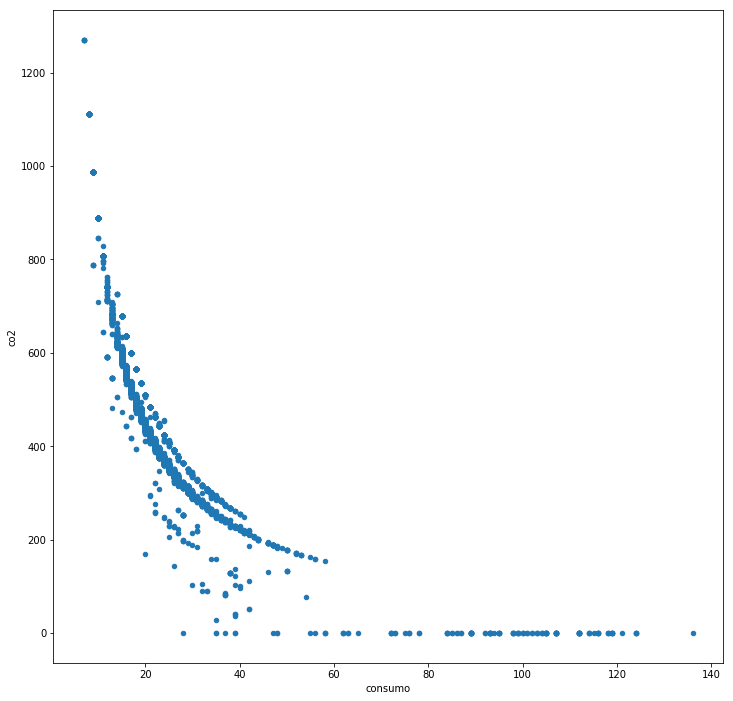

In [60]:
vehiculos.plot.scatter(x='consumo', y='co2')

In [62]:
litros_por_galon = 3.78541

vehiculos['consumo_litros_milla'] = litros_por_galon/vehiculos.consumo

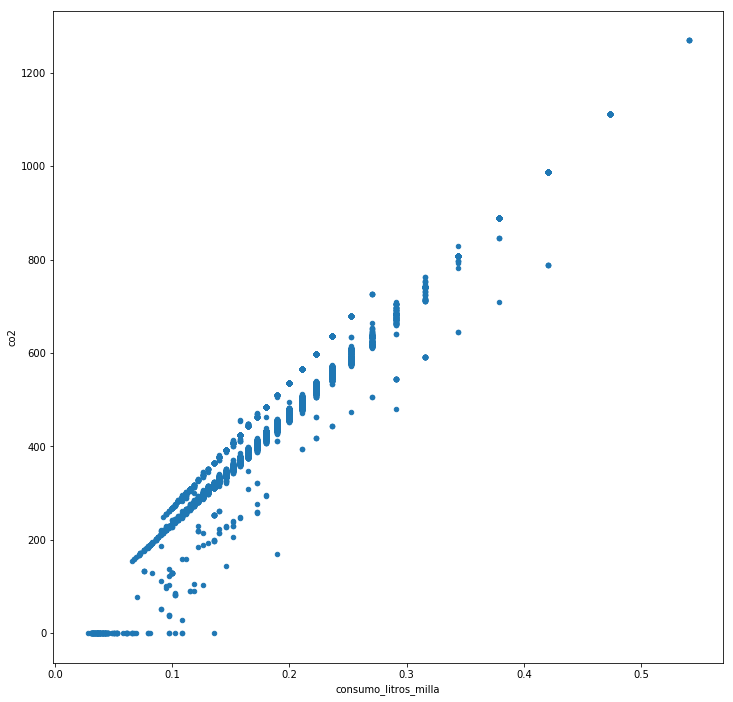

In [64]:
vehiculos.plot.scatter(x='consumo_litros_milla', y='co2')

In [65]:
tipos_consumo = ['muy bajo', 'bajo', 'moderado', 'alto', 'muy alto']

vehiculos['consumo_tipo'] = pd.qcut(vehiculos['consumo_litros_milla'],
                                  5, labels=tipos_consumo)

vehiculos.consumo_tipo.head()

0        alto
2    muy alto
4        alto
5    muy alto
6        alto
Name: consumo_tipo, dtype: category
Categories (5, object): [muy bajo < bajo < moderado < alto < muy alto]

In [66]:
vehiculos.head()

,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,consumo,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
2,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
5,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
6,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,16,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


In [67]:
vehiculos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36930 entries, 0 to 38435
Data columns (total 19 columns):
fabricante              36930 non-null object
modelo                  36930 non-null object
year                    36930 non-null int64
desplazamiento          36790 non-null float64
cilindros               36788 non-null float64
transmision             36919 non-null object
traccion                36133 non-null object
clase                   36930 non-null object
combustible             36930 non-null object
consumo                 36930 non-null int64
co2                     36930 non-null float64
clase_tipo              36930 non-null category
traccion_tipo           36930 non-null category
transmision_tipo        36930 non-null category
combustible_tipo        36930 non-null category
tamano_motor_tipo       36790 non-null category
consumo_tipo            36930 non-null category
co2_tipo                36930 non-null category
consumo_litros_milla    36930 non-null float64
d

# Conclusion Agrupacion de Datos



- La variable `consumo` esta definida en millas por galon y la variable `co2` está definida como gramos por milla. Dado que el co2 es la variable principal del dataset, hemos creado la variable `consumo_litros_milla` definida como litros por milla para poder comparar con `co2`

# Distribución de Variables

## Distribución de Variables Numericas

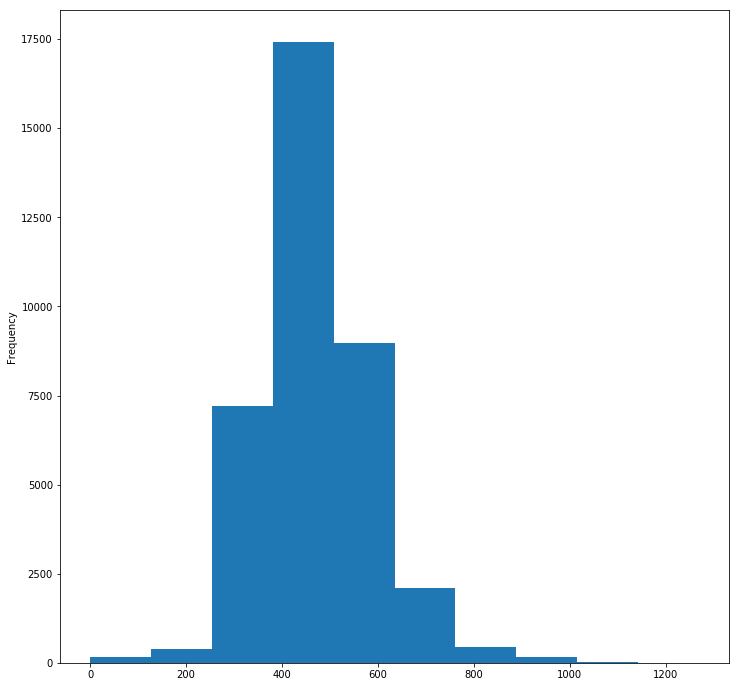

In [70]:
vehiculos['co2'].plot.hist()

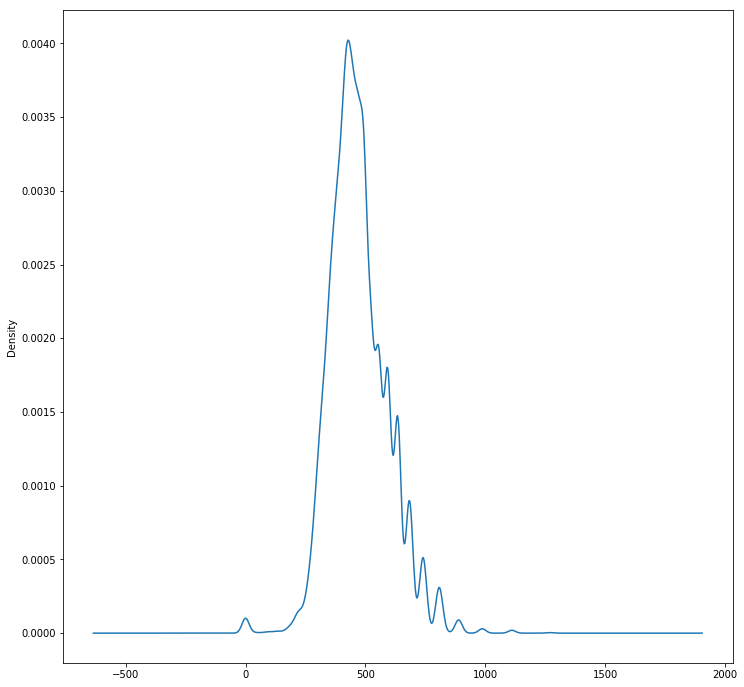

In [71]:
vehiculos['co2'].plot.kde()

In [72]:
def distribucion_variable_numerica(df, col):
    df[col].plot.kde()
    plt.xlabel('Distribucion de la variable {}'.format(col))
    plt.show()

In [73]:
columnas_numericas = vehiculos.select_dtypes(['int', 'float']).columns

In [77]:
interact(distribucion_variable_numerica, col=columnas_numericas, df=fixed(vehiculos));

interactive(children=(Dropdown(description='col', options=('desplazamiento', 'cilindros', 'co2', 'consumo_litr…

In [78]:
vehiculos['cilindros'].value_counts(normalize=True)

4.0     0.381184
6.0     0.350767
8.0     0.220344
5.0     0.020115
12.0    0.015630
3.0     0.006252
10.0    0.004132
2.0     0.001359
16.0    0.000217
Name: cilindros, dtype: float64

### Chequeo de distribucion normal

In [80]:
def normalidad_variable_numerica(col):
    stats.probplot(vehiculos[col], plot=plt)
    plt.xlabel('Diagrama de Probabilidad(normal) de la variable {}'.format(col))
    plt.show()

In [81]:
interact(normalidad_variable_numerica, col=columnas_numericas)

interactive(children=(Dropdown(description='col', options=('desplazamiento', 'cilindros', 'co2', 'consumo_litr…

<function __main__.normalidad_variable_numerica(col)>

In [82]:
for num_col in columnas_numericas:
    _, pval = stats.normaltest(vehiculos[num_col])
    if(pval < 0.05):
        print("Columna {} no sigue una distribución normal".format(num_col))

Columna co2 no sigue una distribución normal
Columna consumo_litros_milla no sigue una distribución normal


C:\Users\vroma\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\vroma\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\vroma\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\vroma\Anaconda3\lib\site-packages\scipy\stats\stats.py:1408: RuntimeWarning: invalid value encountered in less
  term2 = np.where(denom < 0, term1, np.power((1-2.0/A)/denom, 1/3.0))


## Distribución Variables Categoricas

In [83]:
def distribucion_variable_categorica(col):
    vehiculos[col].value_counts(ascending=True,normalize=True).tail(20).plot.barh()
    plt.show()

In [84]:
columnas_categoricas = vehiculos.select_dtypes(['object', 'category']).columns

In [86]:
interact(distribucion_variable_categorica, col=columnas_categoricas);

interactive(children=(Dropdown(description='col', options=('fabricante', 'modelo', 'transmision', 'traccion', …

# Conclusiones Distribución de Variables

- Ninguna variable numérica sigue una distribución normal

- la variable numérica cilindros tiene una distribución de valores discretos no balanceada (cilindrada de 2 y 4 y 8 suman el 95% de los vehiculos). Podria agruparse como variable categórica (2, 4 , 8 y otro)

- El fabricante con la mayor cantidad de modelos es Chevrolet (10% del total)

- 65% de los vehiculos usan gasolina normal

- La distribución de tamaños de motor y de consumo y co2 está equilibrada en todo el rango

- 70% de los vehiculos usan traccion a las dos ruedas

- dos tercios de los coches tienen transmision automática

- La clase mayoritaria de vehiculos es la de coches pequeños (35% del total)
- Los mayores fabricantes en cuanto a vehiculos analizados son los estadounidenses. Esto tiene sentido ya que la EPA es la agencia americana y probablemente es la que tiene más interes en estudiar coches de USA

# Comparaciones

## Recuento por Multiples Grupos

In [87]:
def pivot_recuento(df, rows, columns, calc_field):
    df_pivot = df.pivot_table(values=calc_field, 
                              index=rows, 
                              columns=columns, 
                              aggfunc=np.size
                             ).dropna(axis=0, how='all')
    return df_pivot

In [88]:
consumo_combustible = pivot_recuento(vehiculos,"combustible_tipo","consumo_tipo", "year")
consumo_combustible

consumo_tipo,muy bajo,bajo,moderado,alto,muy alto
combustible_tipo,,,,,
Normal,3158.0,5736.0,4567.0,5686.0,4931.0
Premium,1146.0,3836.0,1627.0,1386.0,2211.0
Otros tipos de combustible,482.0,508.0,586.0,521.0,340.0
Hibrido,2.0,1.0,NaN,200.0,6.0


In [89]:
def heatmap_recuento_tipos(df, col1, col2):
    pivot_table = pivot_recuento(df,col1, col2, "year")
    sns.heatmap(pivot_table, annot=True, fmt='g')
    sns.plt.ylabel(col1)
    sns.plt.xlabel(col2)
    plt.show()

interactive(children=(Dropdown(description='col1', options=('fabricante', 'modelo', 'year', 'desplazamiento', …

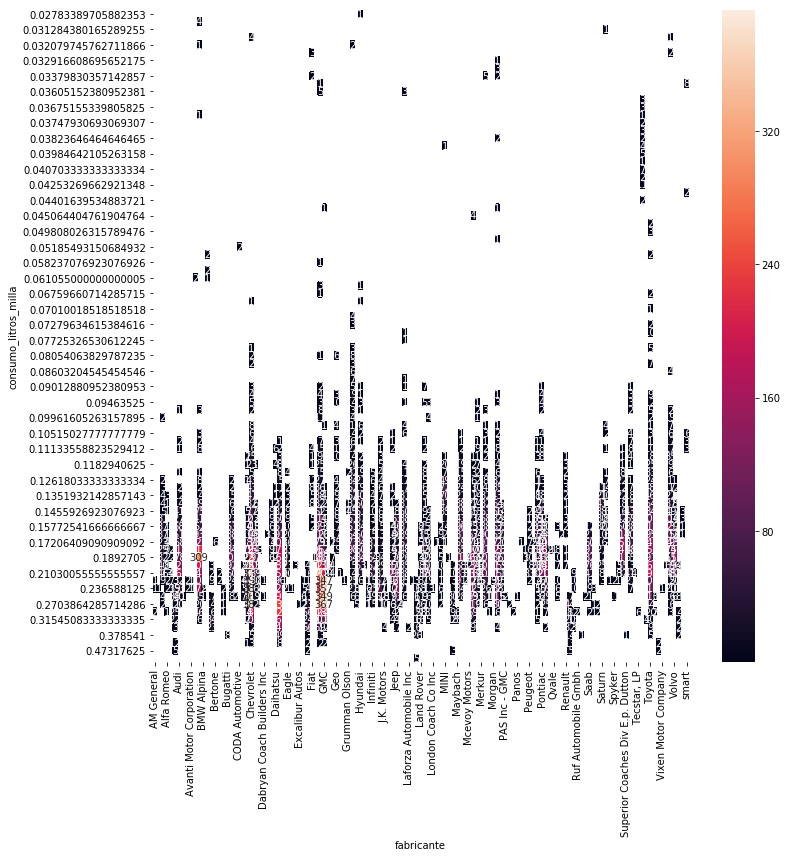

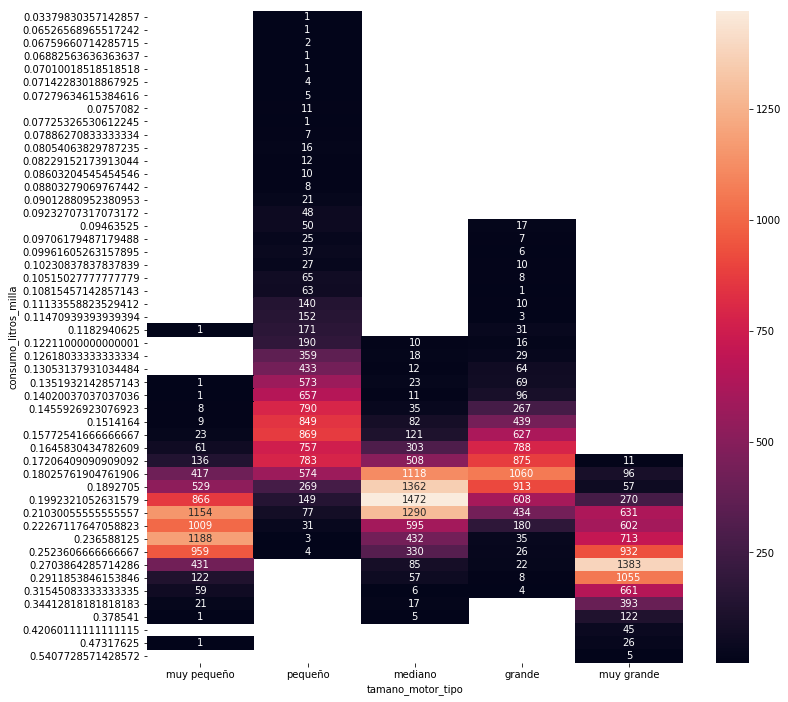

In [90]:
interact(heatmap_recuento_tipos, col1=vehiculos.columns, col2=vehiculos.columns, df=fixed(vehiculos));

### Conclusiones

- Hay mas vehiculos de dos ruedas de bajo consumo que de traccion a las 4 ruedas
- Los fabricantes se concentran mas en vehiculos de motor pequeño/bajo consumo y motor muy grande/alto consumo
- La mayor parte de coches tienen transmision automatica, con los coches pequeños teniendo valores similares de coches automaticos y manuales
- Hay una cantidad de camionetas que son mas contaminantes que cualquier otro tipo de coche

## Medias por Variables Categoricas

In [91]:
def medias_por_categoria(col_grupo, col_calculo):
    vehiculos.groupby(col_grupo)[col_calculo].mean().plot.barh()
    plt.ylabel(col_grupo)
    plt.xlabel('Valores medios de {}'.format(col_calculo))
    plt.show()

In [94]:
columnas_numericas = vehiculos.select_dtypes(['int', 'float']).columns
columnas_categoricas = vehiculos.select_dtypes(['object', 'category']).columns
columnas_tipo = [col for col in vehiculos.columns if col.endswith("_tipo")]

In [95]:
interact(medias_por_categoria, col_grupo=columnas_categoricas, col_calculo=columnas_numericas);

interactive(children=(Dropdown(description='col_grupo', options=('fabricante', 'modelo', 'transmision', 'tracc…

### Conclusiones

- Camionentas de gasolina Premium consumen un 38% más que vehiculos pequeños que usan el mismo tipo de gasolina

## Comparación de Tendencias Temporales

In [96]:
vehiculos_pre_2017 = vehiculos.query("year<2017")

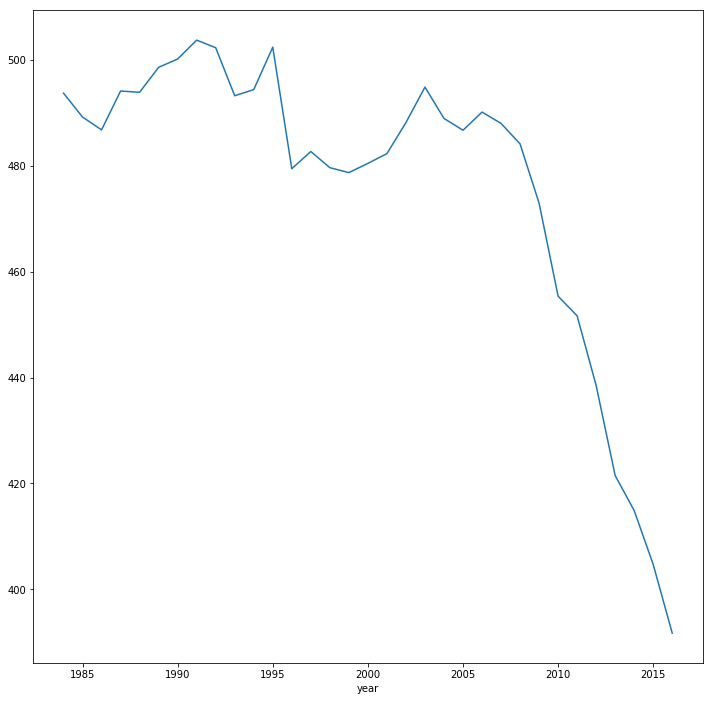

In [97]:
vehiculos_pre_2017.groupby('year')['co2'].mean().plot()

In [98]:
def evolución_medias(col_calculo):
    vehiculos_pre_2017.groupby('year')[col_calculo].mean().plot()
    plt.show()

In [99]:
interact(evolución_medias, col_calculo=columnas_numericas);

interactive(children=(Dropdown(description='col_calculo', options=('desplazamiento', 'cilindros', 'co2', 'cons…

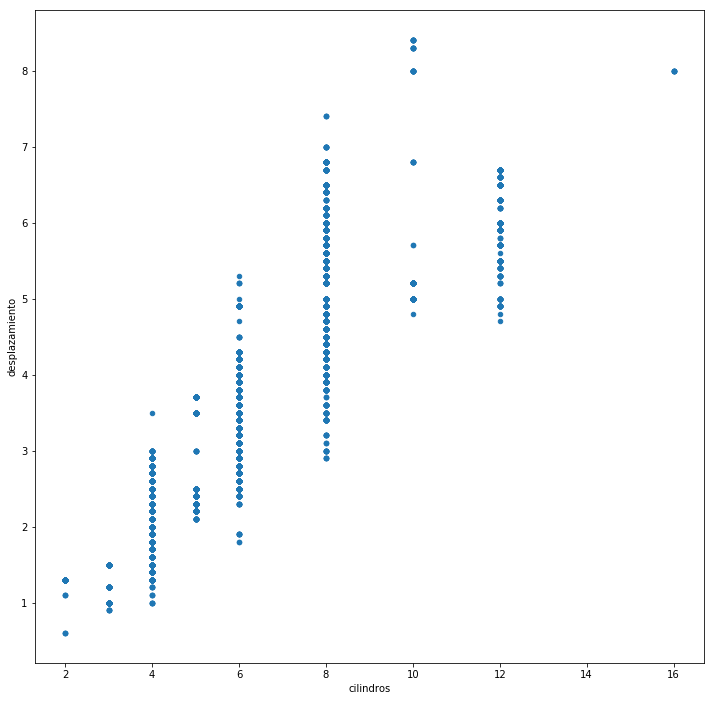

In [102]:
vehiculos.plot.scatter(x="cilindros",y="desplazamiento")

In [103]:
def evolución_recuento(col_calculo):
    for categoria in vehiculos_pre_2017[col_calculo].unique():
        n_vehiculos_categoria_ano = vehiculos_pre_2017[vehiculos_pre_2017[col_calculo]==categoria].groupby(
            'year').apply(np.size)
        plt.plot(
            n_vehiculos_categoria_ano.index,
            n_vehiculos_categoria_ano,
            label=categoria
        )
        plt.legend()

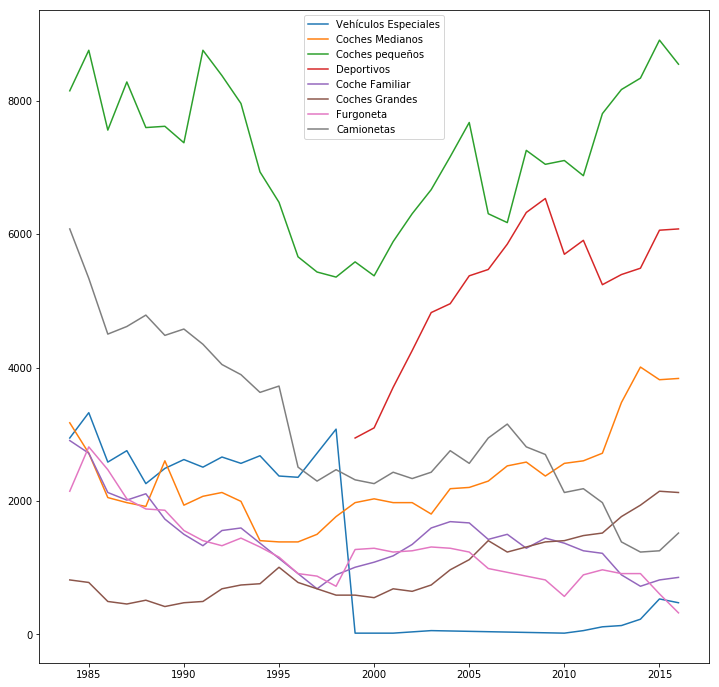

In [104]:
evolución_recuento("clase_tipo")

# Conclusiones del Analisis

Una vez hemos terminado el análisis, el paso final es compilar toda la información obtenida en un documento. Dicho documento tiene dos objetivos principales:

- Informar a aquellas personas interesadas de los descubrimientos encontrados. ¿Esto nos incluye a nosotros mismos en el futuro!
- Facilitar la replicación del análisis por otros Data Scientists.


# Conclusiones del análisis


#### Descripción

El dataset consiste en información relativa a vehículos vendidos en USA desde 1985. Dicha información incluye detalles técnicos (cilindrada, tipo de transmisión) y detalles medioambientales (consumo de gasolina, emisiones de CO2)

El archivo original está en: https://www.fueleconomy.gov/feg/epadata/vehicles.csv.zip
El archivo que vamos a usar es una versión modificada (con menos columnas)

Descripcion del dataset Original
http://www.fueleconomy.gov/feg/ws/index.shtml#ft7

Las entidades de las que consta dicho dataset son:

* fabricante
* fabricante-modelo
* fabricante-model-año
* fabricante-año

Las variables que existen en dicho dataset son:

```
fabricante         categorica
modelo             categorica
year               ordinal/numérica
desplazamiento     numérica
cilindros          numérica
transmision        categorica
traccion           categorica
clase              categorica
combustible        categorica
consumo            numérica
co2                numérica
```

#### QA

- Las variables desplazamiento, cilindros, transmision y traccion tienen valores inexistentes
- hay un outlier en las variables `co2` y `consumo`
- Hay coches hibridos y coches electricos (hemos removido estos ultimos ya que no contaminan).
- La variable `consumo` esta definida en millas por galon y la variable `co2` está definida como gramos por milla. Dado que el co2 es la variable principal del dataset, hemos creado la variable `consumo_litros_milla` definida como litros por milla para poder comparar con `co2`

#### Distribución de variables

- Ninguna variable numérica sigue una distribución normal

- la variable numérica `cilindros` tiene una distribución de valores discretos no balanceada (cilindrada de 2 y 4 y 8 suman el 95% de los vehiculos). Podria agruparse como variable categórica (2, 4 , 8 y otro)

- El fabricante con la mayor cantidad de modelos es Chevrolet (10% del total)

- 65% de los vehiculos usan gasolina normal

- La distribución de tamaños de motor y de consumo y co2 está equilibrada en todo el rango

- 70% de los vehiculos usan traccion a las dos ruedas

- dos tercios de los coches tienen transmision automática

- La clase mayoritaria de vehiculos es la de coches pequeños (35% del total)

- Existen relaciones lineales entre cilindros/desplazamiento y co2/consumo_litros_milla

#### Comparaciones

- Hay mas vehiculos de dos ruedas de bajo consumo que de traccion a las 4 ruedas
- Los fabricantes se concentran mas en vehiculos de motor pequeño/bajo consumo y motor muy grande/alto consumo
- La mayor parte de coches tienen transmision automatica, con los coches pequeños teniendo valores similares de coches automaticos y manuales
- Hay una cantidad de camionetas que son mas contaminantes que cualquier otro tipo de coche
- Vehiculos con transmision automatica tienen valores de co2 y consumo ligeramente más altos
- Furgonetas y camionetas tienen el consumo más alto (alrededor de 0.25 litros/milla). Por otra parte, los coches familiares y pequeños tienen el menor consumo de gasolina (~0.15 litros/milla)
- los valores de co2 son similares  independientemente del tipo de gasolina empleado
- Camionentas de gasolina Premium consumen un 38% más que vehiculos pequeños que usan el mismo tipo de gasolina
- El consumo y emisión de co2 han ido bajando de forma continuada desde 1985
- Históricamente se ha ido aumentando la cilindrada en los vehiculos fabricados, pero a partir de 2010 esta tendencia se invierte